In [1]:
#!pip install --upgrade pip
#!pip install missingno
import pandas as pd
import numpy as np
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy.stats import shapiro, mannwhitneyu
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importando o dataset
df_marketing = pd.read_csv('dataset.csv')

In [3]:
# visualizando o shape
df_marketing.shape

(2237, 25)

In [4]:
# Visualizando amostra (primeiros registros)
df_marketing.head()

,ID,Ano_Nascimento,Educacao,Estado_Civil,Renda,Criancas_Em_Casa,Adolescentes_Em_Casa,Data_Cadastro_Cliente,Gasto_Vinhos,Gasto_Frutas,...,Num_Compras_Web,Num_Compras_Catalogo,Num_Compras_Loja,Num_Visitas_Web_Mes,Aceitou_Campanha_1,Aceitou_Campanha_2,Aceitou_Campanha_3,Aceitou_Campanha_4,Aceitou_Campanha_5,Aceitou_Campanha_6
0,9970,1977,Graduação,Casado,"$55,375.00",0,1,10/17/13,42,11,...,1,1,6,2,0,0,0,0,0,0
1,4002,1960,PhD,Casado,"$77,037.00",0,1,10/13/13,463,96,...,7,7,12,3,0,0,0,0,0,0
2,10914,1970,Graduação,Solteiro,"$24,163.00",1,1,2010-12-13,4,1,...,1,0,3,4,0,0,0,0,0,0
3,7279,1969,PhD,Casado,"$69,476.00",0,0,9/30/13,260,86,...,4,6,4,2,0,0,0,0,0,0
4,10582,1979,Graduação,Casado,"$72,063.00",0,1,2007-03-13,180,32,...,5,2,12,2,0,0,0,0,0,0


In [5]:
# iniciando EDA
df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ID                         2237 non-null   int64 
 1    Ano_Nascimento            2237 non-null   int64 
 2    Educacao                  2237 non-null   object
 3    Estado_Civil              2237 non-null   object
 4    Renda                     2213 non-null   object
 5    Criancas_Em_Casa          2237 non-null   int64 
 6    Adolescentes_Em_Casa      2237 non-null   int64 
 7    Data_Cadastro_Cliente     2237 non-null   object
 8    Gasto_Vinhos              2237 non-null   int64 
 9    Gasto_Frutas              2237 non-null   int64 
 10   Gasto_Carnes              2237 non-null   int64 
 11   Gasto_Peixes              2237 non-null   int64 
 12   Gasto_Doces               2237 non-null   int64 
 13   Gasto_Outros              2237 non-null   int64 
 14   Num_Com

In [6]:
# Iniciando a limpeza dos dados e problemas identificados
# Removendo o espaço que existe no início dos cabeçalhos das colunas
df_marketing.columns = df_marketing.columns.str.replace(' ', '')

In [7]:
# transformar a coluna "Renda" que está como object para numérico
df_marketing['Renda'] = df_marketing['Renda'].str.replace('$', '').str.replace(',','').astype(float)

In [8]:
# Coluna de data também está como object, converter usando o datetime
df_marketing['Data_Cadastro_Cliente'] = pd.to_datetime(df_marketing['Data_Cadastro_Cliente'])

In [9]:
# verificando as alterações realizadas
df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        2237 non-null   int64         
 1   Ano_Nascimento            2237 non-null   int64         
 2   Educacao                  2237 non-null   object        
 3   Estado_Civil              2237 non-null   object        
 4   Renda                     2213 non-null   float64       
 5   Criancas_Em_Casa          2237 non-null   int64         
 6   Adolescentes_Em_Casa      2237 non-null   int64         
 7   Data_Cadastro_Cliente     2237 non-null   datetime64[ns]
 8   Gasto_Vinhos              2237 non-null   int64         
 9   Gasto_Frutas              2237 non-null   int64         
 10  Gasto_Carnes              2237 non-null   int64         
 11  Gasto_Peixes              2237 non-null   int64         
 12  Gasto_Doces         

In [10]:
df_marketing.head()

,ID,Ano_Nascimento,Educacao,Estado_Civil,Renda,Criancas_Em_Casa,Adolescentes_Em_Casa,Data_Cadastro_Cliente,Gasto_Vinhos,Gasto_Frutas,...,Num_Compras_Web,Num_Compras_Catalogo,Num_Compras_Loja,Num_Visitas_Web_Mes,Aceitou_Campanha_1,Aceitou_Campanha_2,Aceitou_Campanha_3,Aceitou_Campanha_4,Aceitou_Campanha_5,Aceitou_Campanha_6
0,9970,1977,Graduação,Casado,55375.0,0,1,2013-10-17,42,11,...,1,1,6,2,0,0,0,0,0,0
1,4002,1960,PhD,Casado,77037.0,0,1,2013-10-13,463,96,...,7,7,12,3,0,0,0,0,0,0
2,10914,1970,Graduação,Solteiro,24163.0,1,1,2010-12-13,4,1,...,1,0,3,4,0,0,0,0,0,0
3,7279,1969,PhD,Casado,69476.0,0,0,2013-09-30,260,86,...,4,6,4,2,0,0,0,0,0,0
4,10582,1979,Graduação,Casado,72063.0,0,1,2007-03-13,180,32,...,5,2,12,2,0,0,0,0,0,0


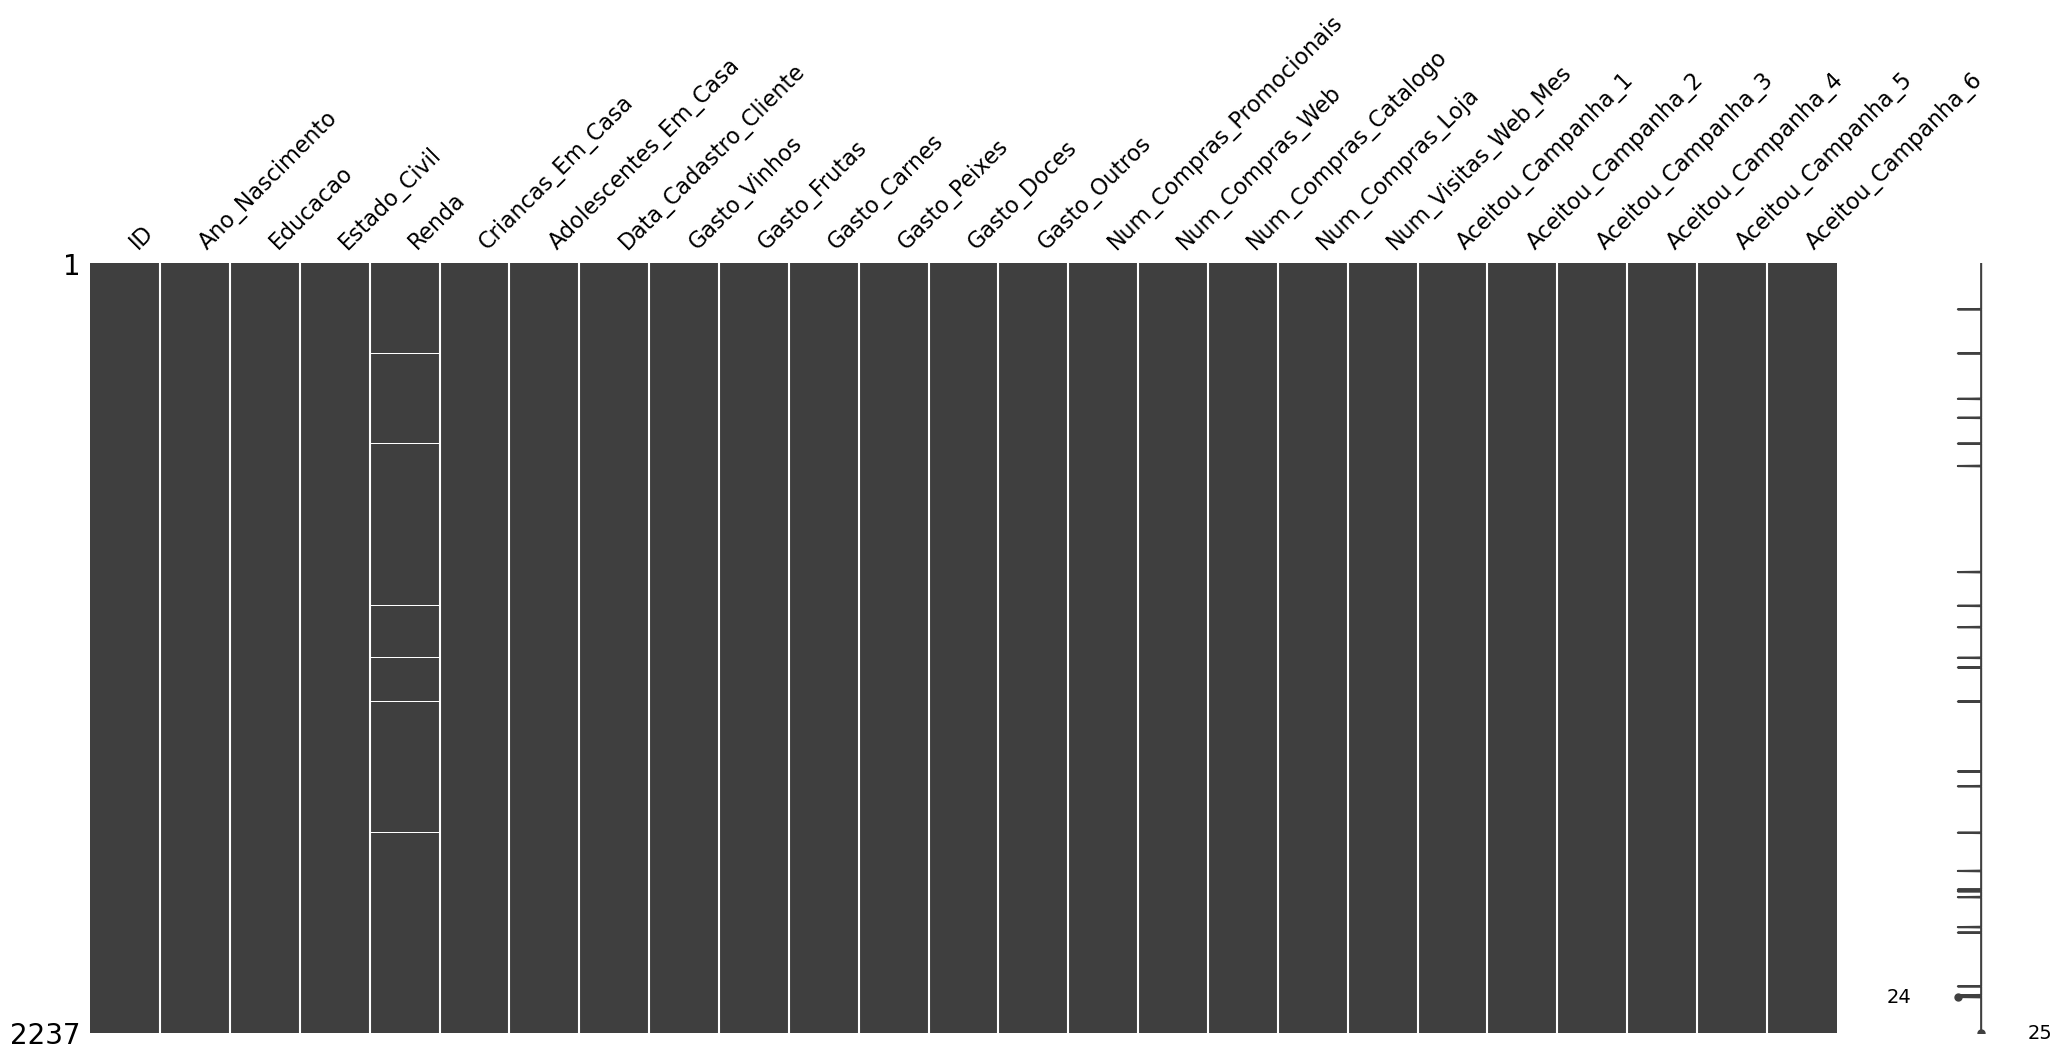

In [11]:
# Matriz de valores ausentes
msno.matrix(df_marketing)
plt.show()

In [12]:
# Somando os valores ausentes
valores_ausentes = df_marketing.isnull().sum().sort_values(ascending=False)

In [13]:
#visualizando os valores ausentes
valores_ausentes

Renda                       24
ID                           0
Gasto_Outros                 0
Aceitou_Campanha_5           0
Aceitou_Campanha_4           0
Aceitou_Campanha_3           0
Aceitou_Campanha_2           0
Aceitou_Campanha_1           0
Num_Visitas_Web_Mes          0
Num_Compras_Loja             0
Num_Compras_Catalogo         0
Num_Compras_Web              0
Num_Compras_Promocionais     0
Gasto_Doces                  0
Ano_Nascimento               0
Gasto_Peixes                 0
Gasto_Carnes                 0
Gasto_Frutas                 0
Gasto_Vinhos                 0
Data_Cadastro_Cliente        0
Adolescentes_Em_Casa         0
Criancas_Em_Casa             0
Estado_Civil                 0
Educacao                     0
Aceitou_Campanha_6           0
dtype: int64

In [16]:
# apenas a renda possui valores ausentes
# filtro para validar (caso haja muitas variáveis no dataset)
print(valores_ausentes.loc[valores_ausentes > 0])

Renda    24
dtype: int64


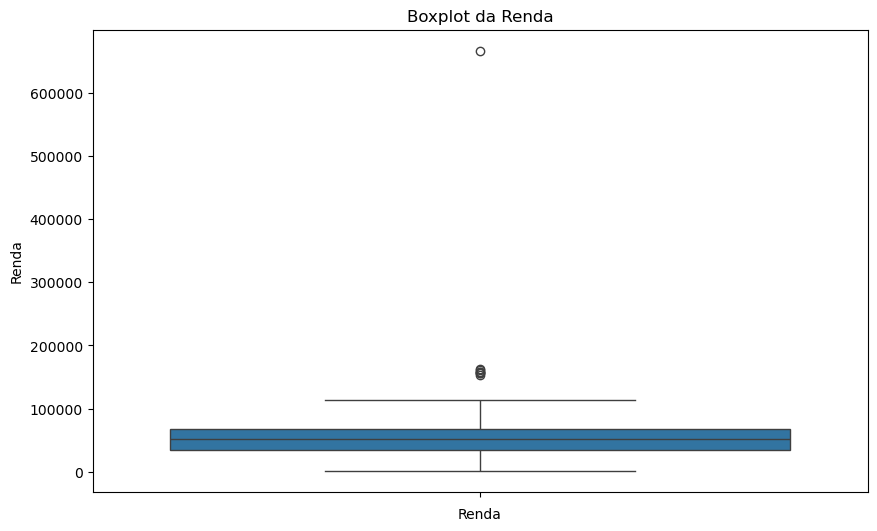

In [17]:
# Tratamento dos valores ausentes
# Analisando se há outliers na coluna 'Renda'
# boxplot para visualizar os dados
plt.figure(figsize=(10,6))
sns.boxplot(df_marketing['Renda'])
plt.title('Boxplot da Renda')
plt.xlabel('Renda')
plt.show()

In [18]:
# Há outliers nos dados de renda.
# Analisando o intervalo interquartil (IQR) para validar
Q1 = df_marketing['Renda'].quantile(0.25)
Q3 = df_marketing['Renda'].quantile(0.75)
IQR = Q3 - Q1
IQR

33241.0

In [21]:
# Definindo limites para consideração de outlier
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Classificando os outliers
outliers = df_marketing[(df_marketing['Renda'] < limite_inferior) | (df_marketing['Renda'] > limite_superior)]
outliers

,ID,Ano_Nascimento,Educacao,Estado_Civil,Renda,Criancas_Em_Casa,Adolescentes_Em_Casa,Data_Cadastro_Cliente,Gasto_Vinhos,Gasto_Frutas,...,Num_Compras_Web,Num_Compras_Catalogo,Num_Compras_Loja,Num_Visitas_Web_Mes,Aceitou_Campanha_1,Aceitou_Campanha_2,Aceitou_Campanha_3,Aceitou_Campanha_4,Aceitou_Campanha_5,Aceitou_Campanha_6
325,4931,1977,Graduação,Casado,157146.0,0,0,2013-04-29,1,0,...,0,28,0,1,0,0,0,0,0,0
497,1501,1982,PhD,Casado,160803.0,0,0,2008-04-12,55,16,...,0,28,1,0,0,0,0,0,0,0
526,9432,1977,Graduação,Casado,666666.0,1,0,2006-02-13,9,14,...,3,1,3,6,0,0,0,0,0,0
730,1503,1976,PhD,Casado,162397.0,1,1,2006-03-13,85,1,...,0,0,1,1,0,0,0,0,0,0
851,5336,1971,Mestrado,Casado,157733.0,1,0,2006-04-13,39,1,...,1,0,1,1,0,0,0,0,0,0
1787,5555,1975,Graduação,Divorciado,153924.0,0,0,2002-07-14,1,1,...,0,0,0,0,0,0,0,0,0,0
1886,11181,1949,PhD,Casado,156924.0,0,0,2013-08-29,2,1,...,0,0,0,0,0,0,0,0,0,0
2165,8475,1973,PhD,Casado,157243.0,0,1,2003-01-14,20,2,...,0,22,0,0,0,0,0,0,0,0


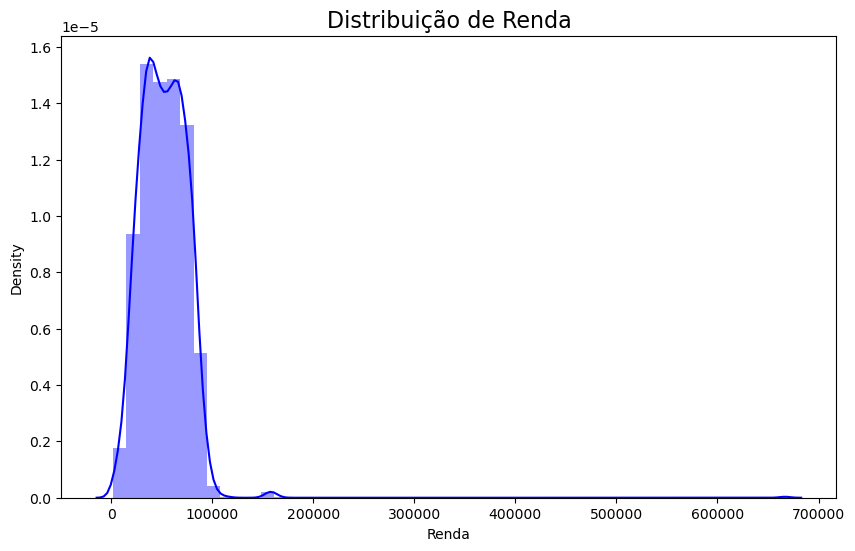

In [22]:
# visualizando a distribuição da variável
plt.figure(figsize=(10,6))

# Gráfico de distribuição
sns.distplot(df_marketing['Renda'], color='blue')

# Formatação do gráfico
plt.title('Distribuição de Renda', size = 16)

plt.show()

In [25]:
# Considerando o pouco volume de outliers (8 registros) foi
# decidido que o melhor caminho é a remoção dos registros. Isso pois
# não deve haver impacto na análise a remoção dos outliers

# filtro para remoção dos outliers
df_marketing = df_marketing[(df_marketing['Renda'] >= limite_inferior) & (df_marketing['Renda'] <= limite_superior)]
df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2205 entries, 0 to 2236
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        2205 non-null   int64         
 1   Ano_Nascimento            2205 non-null   int64         
 2   Educacao                  2205 non-null   object        
 3   Estado_Civil              2205 non-null   object        
 4   Renda                     2205 non-null   float64       
 5   Criancas_Em_Casa          2205 non-null   int64         
 6   Adolescentes_Em_Casa      2205 non-null   int64         
 7   Data_Cadastro_Cliente     2205 non-null   datetime64[ns]
 8   Gasto_Vinhos              2205 non-null   int64         
 9   Gasto_Frutas              2205 non-null   int64         
 10  Gasto_Carnes              2205 non-null   int64         
 11  Gasto_Peixes              2205 non-null   int64         
 12  Gasto_Doces              

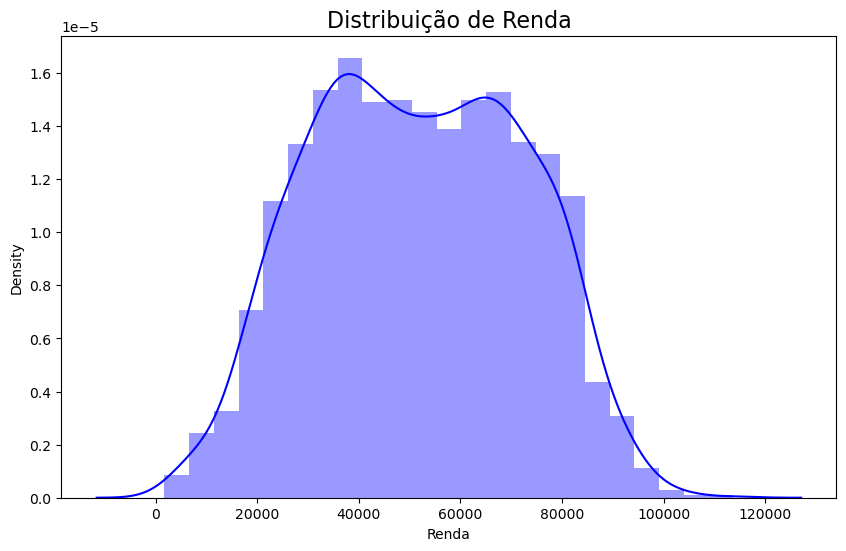

In [26]:
# visualizando a distribuição novamente
plt.figure(figsize=(10,6))

# Gráfico de distribuição
sns.distplot(df_marketing['Renda'], color='blue')

# Formatação do gráfico
plt.title('Distribuição de Renda', size = 16)

plt.show()

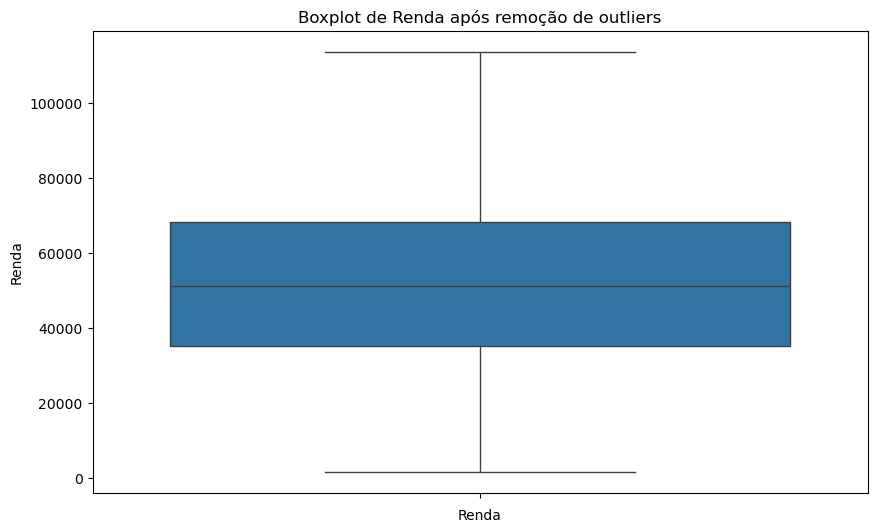

In [27]:
# visualizando com um boxplot
plt.figure(figsize=(10,6))

sns.boxplot(df_marketing['Renda'])
plt.title('Boxplot de Renda após remoção de outliers')
plt.xlabel('Renda')

plt.show()

In [28]:
# Com os outliers removidos, irei aplicar o tratamento dos valores ausentes
# Aplicando a normalização dos dados
scaler = StandardScaler()
dados_normalizados = scaler.fit_transform(df_marketing[['Renda']])
dados_normalizados

array([[ 0.18122652],
       [ 1.22727716],
       [-1.32599038],
       ...,
       [-1.26577318],
       [-1.85249256],
       [-0.43127954]])

In [29]:
# Cria o KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Esse algoritmo olha para os 5 "vizinhos" mais próximos do valor desejado (ausente)
# para prever o valor que está faltando

# insere os valores ausentes
dados_inseridos = imputer.fit_transform(dados_normalizados)

# Converte os dados de volta para o formato (escala) original
df_marketing['Renda'] = scaler.inverse_transform(dados_inseridos)

In [30]:
print(f'Total de Valores ausentes: {df_marketing.isnull().sum().sum()}')

Total de Valores ausentes: 0


In [31]:
df_marketing.head()

,ID,Ano_Nascimento,Educacao,Estado_Civil,Renda,Criancas_Em_Casa,Adolescentes_Em_Casa,Data_Cadastro_Cliente,Gasto_Vinhos,Gasto_Frutas,...,Num_Compras_Web,Num_Compras_Catalogo,Num_Compras_Loja,Num_Visitas_Web_Mes,Aceitou_Campanha_1,Aceitou_Campanha_2,Aceitou_Campanha_3,Aceitou_Campanha_4,Aceitou_Campanha_5,Aceitou_Campanha_6
0,9970,1977,Graduação,Casado,55375.0,0,1,2013-10-17,42,11,...,1,1,6,2,0,0,0,0,0,0
1,4002,1960,PhD,Casado,77037.0,0,1,2013-10-13,463,96,...,7,7,12,3,0,0,0,0,0,0
2,10914,1970,Graduação,Solteiro,24163.0,1,1,2010-12-13,4,1,...,1,0,3,4,0,0,0,0,0,0
3,7279,1969,PhD,Casado,69476.0,0,0,2013-09-30,260,86,...,4,6,4,2,0,0,0,0,0,0
4,10582,1979,Graduação,Casado,72063.0,0,1,2007-03-13,180,32,...,5,2,12,2,0,0,0,0,0,0


In [32]:
# Após a Limpeza e Processamento dos dados inicia-se a EDA
# Colunas do DF
df_marketing.columns

Index(['ID', 'Ano_Nascimento', 'Educacao', 'Estado_Civil', 'Renda',
       'Criancas_Em_Casa', 'Adolescentes_Em_Casa', 'Data_Cadastro_Cliente',
       'Gasto_Vinhos', 'Gasto_Frutas', 'Gasto_Carnes', 'Gasto_Peixes',
       'Gasto_Doces', 'Gasto_Outros', 'Num_Compras_Promocionais',
       'Num_Compras_Web', 'Num_Compras_Catalogo', 'Num_Compras_Loja',
       'Num_Visitas_Web_Mes', 'Aceitou_Campanha_1', 'Aceitou_Campanha_2',
       'Aceitou_Campanha_3', 'Aceitou_Campanha_4', 'Aceitou_Campanha_5',
       'Aceitou_Campanha_6'],
      dtype='object')

In [36]:
# Criar um Boxplot apenas com as variáveis quantitativas
dados_boxplot = df_marketing.drop(columns= ['ID', 
                                            'Educacao', 
                                            'Estado_Civil', 
                                            'Criancas_Em_Casa', 
                                            'Adolescentes_Em_Casa', 
                                            'Aceitou_Campanha_1', 
                                            'Aceitou_Campanha_2', 
                                            'Aceitou_Campanha_3', 
                                            'Aceitou_Campanha_4', 
                                            'Aceitou_Campanha_5',
                                            'Aceitou_Campanha_6'])

dados_boxplot.columns

Index(['Ano_Nascimento', 'Renda', 'Data_Cadastro_Cliente', 'Gasto_Vinhos',
       'Gasto_Frutas', 'Gasto_Carnes', 'Gasto_Peixes', 'Gasto_Doces',
       'Gasto_Outros', 'Num_Compras_Promocionais', 'Num_Compras_Web',
       'Num_Compras_Catalogo', 'Num_Compras_Loja', 'Num_Visitas_Web_Mes'],
      dtype='object')

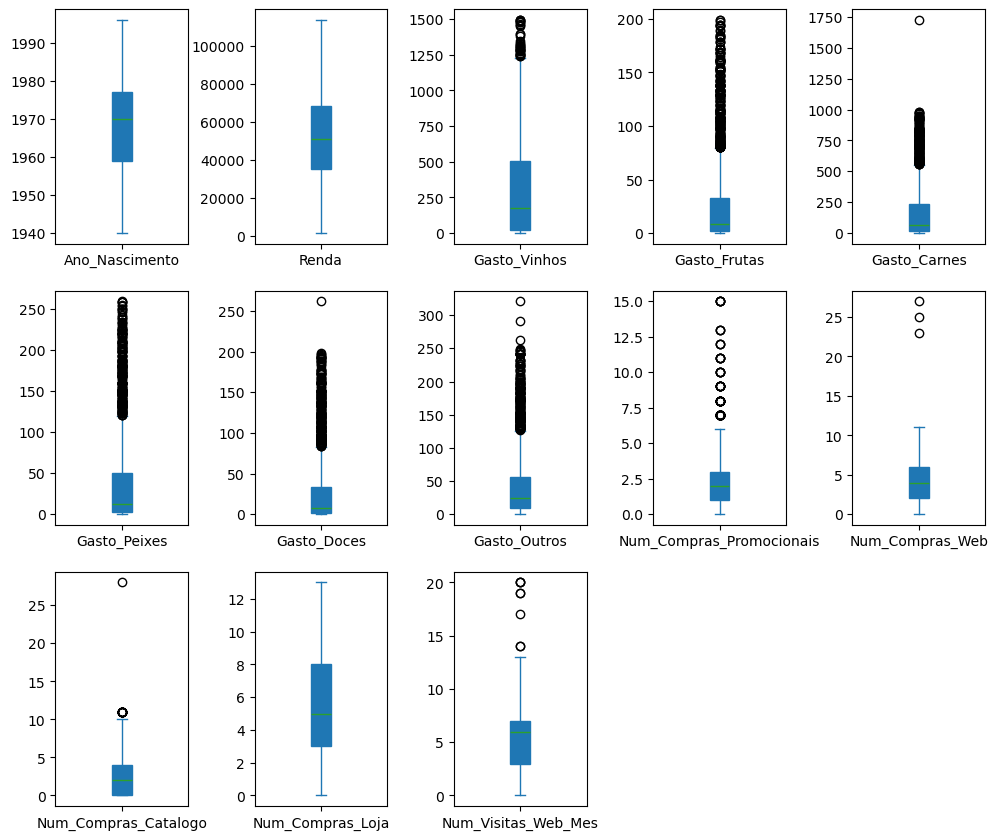

In [39]:
# plotando o gráfico com o método "plot" do pandas. Cada variável em um subplot
dados_boxplot.plot(subplots=True, layout=(4,5), kind='box', figsize=(12,14), patch_artist=True)
plt.subplots_adjust(wspace=0.5)

In [40]:
# Aplicando ENGENHARIA DE ATRIBUTOS para identificar possíveis valores "ocultos" nos dados
# Criando novas colunas, combinando outras para gerar valor, etc

# Criando coluna de idade do cliente
ano_atual = datetime.now().year
df_marketing['Idade'] = ano_atual - df_marketing['Ano_Nascimento']

df_marketing.head()

,ID,Ano_Nascimento,Educacao,Estado_Civil,Renda,Criancas_Em_Casa,Adolescentes_Em_Casa,Data_Cadastro_Cliente,Gasto_Vinhos,Gasto_Frutas,...,Num_Compras_Catalogo,Num_Compras_Loja,Num_Visitas_Web_Mes,Aceitou_Campanha_1,Aceitou_Campanha_2,Aceitou_Campanha_3,Aceitou_Campanha_4,Aceitou_Campanha_5,Aceitou_Campanha_6,Idade
0,9970,1977,Graduação,Casado,55375.0,0,1,2013-10-17,42,11,...,1,6,2,0,0,0,0,0,0,49
1,4002,1960,PhD,Casado,77037.0,0,1,2013-10-13,463,96,...,7,12,3,0,0,0,0,0,0,66
2,10914,1970,Graduação,Solteiro,24163.0,1,1,2010-12-13,4,1,...,0,3,4,0,0,0,0,0,0,56
3,7279,1969,PhD,Casado,69476.0,0,0,2013-09-30,260,86,...,6,4,2,0,0,0,0,0,0,57
4,10582,1979,Graduação,Casado,72063.0,0,1,2007-03-13,180,32,...,2,12,2,0,0,0,0,0,0,47


In [41]:
# Nova coluna para calcular a quantos dias o cliente está cadastrado (fidelidade)
df_marketing['Dias_Como_Cliente'] = df_marketing['Data_Cadastro_Cliente'].max() - df_marketing['Data_Cadastro_Cliente']
# visualizando nova coluna
df_marketing.head()

,ID,Ano_Nascimento,Educacao,Estado_Civil,Renda,Criancas_Em_Casa,Adolescentes_Em_Casa,Data_Cadastro_Cliente,Gasto_Vinhos,Gasto_Frutas,...,Num_Compras_Loja,Num_Visitas_Web_Mes,Aceitou_Campanha_1,Aceitou_Campanha_2,Aceitou_Campanha_3,Aceitou_Campanha_4,Aceitou_Campanha_5,Aceitou_Campanha_6,Idade,Dias_Como_Cliente
0,9970,1977,Graduação,Casado,55375.0,0,1,2013-10-17,42,11,...,6,2,0,0,0,0,0,0,49,255 days
1,4002,1960,PhD,Casado,77037.0,0,1,2013-10-13,463,96,...,12,3,0,0,0,0,0,0,66,259 days
2,10914,1970,Graduação,Solteiro,24163.0,1,1,2010-12-13,4,1,...,3,4,0,0,0,0,0,0,56,1294 days
3,7279,1969,PhD,Casado,69476.0,0,0,2013-09-30,260,86,...,4,2,0,0,0,0,0,0,57,272 days
4,10582,1979,Graduação,Casado,72063.0,0,1,2007-03-13,180,32,...,12,2,0,0,0,0,0,0,47,2665 days


In [42]:
# Dias como cliente formatado, removendo a palavra "days"
df_marketing['Dias_Como_Cliente'] = df_marketing['Dias_Como_Cliente'].astype(str).str.replace(' days', '')
# visualizando nova coluna
df_marketing.head()

,ID,Ano_Nascimento,Educacao,Estado_Civil,Renda,Criancas_Em_Casa,Adolescentes_Em_Casa,Data_Cadastro_Cliente,Gasto_Vinhos,Gasto_Frutas,...,Num_Compras_Loja,Num_Visitas_Web_Mes,Aceitou_Campanha_1,Aceitou_Campanha_2,Aceitou_Campanha_3,Aceitou_Campanha_4,Aceitou_Campanha_5,Aceitou_Campanha_6,Idade,Dias_Como_Cliente
0,9970,1977,Graduação,Casado,55375.0,0,1,2013-10-17,42,11,...,6,2,0,0,0,0,0,0,49,255
1,4002,1960,PhD,Casado,77037.0,0,1,2013-10-13,463,96,...,12,3,0,0,0,0,0,0,66,259
2,10914,1970,Graduação,Solteiro,24163.0,1,1,2010-12-13,4,1,...,3,4,0,0,0,0,0,0,56,1294
3,7279,1969,PhD,Casado,69476.0,0,0,2013-09-30,260,86,...,4,2,0,0,0,0,0,0,57,272
4,10582,1979,Graduação,Casado,72063.0,0,1,2007-03-13,180,32,...,12,2,0,0,0,0,0,0,47,2665


In [43]:
df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2205 entries, 0 to 2236
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        2205 non-null   int64         
 1   Ano_Nascimento            2205 non-null   int64         
 2   Educacao                  2205 non-null   object        
 3   Estado_Civil              2205 non-null   object        
 4   Renda                     2205 non-null   float64       
 5   Criancas_Em_Casa          2205 non-null   int64         
 6   Adolescentes_Em_Casa      2205 non-null   int64         
 7   Data_Cadastro_Cliente     2205 non-null   datetime64[ns]
 8   Gasto_Vinhos              2205 non-null   int64         
 9   Gasto_Frutas              2205 non-null   int64         
 10  Gasto_Carnes              2205 non-null   int64         
 11  Gasto_Peixes              2205 non-null   int64         
 12  Gasto_Doces              

In [44]:
# Convertendo o tipo de dados da coluna Dias_Como_Cliente
df_marketing['Dias_Como_Cliente'] = pd.to_numeric(df_marketing['Dias_Como_Cliente'], downcast = 'integer')

In [45]:
df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2205 entries, 0 to 2236
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        2205 non-null   int64         
 1   Ano_Nascimento            2205 non-null   int64         
 2   Educacao                  2205 non-null   object        
 3   Estado_Civil              2205 non-null   object        
 4   Renda                     2205 non-null   float64       
 5   Criancas_Em_Casa          2205 non-null   int64         
 6   Adolescentes_Em_Casa      2205 non-null   int64         
 7   Data_Cadastro_Cliente     2205 non-null   datetime64[ns]
 8   Gasto_Vinhos              2205 non-null   int64         
 9   Gasto_Frutas              2205 non-null   int64         
 10  Gasto_Carnes              2205 non-null   int64         
 11  Gasto_Peixes              2205 non-null   int64         
 12  Gasto_Doces              

In [46]:
# Cria coluna com o total de compras do cliente (independente do canal)
df_marketing['Total_Compras'] = df_marketing['Num_Compras_Web'] + df_marketing['Num_Compras_Catalogo'] + df_marketing['Num_Compras_Loja']
df_marketing.head()

,ID,Ano_Nascimento,Educacao,Estado_Civil,Renda,Criancas_Em_Casa,Adolescentes_Em_Casa,Data_Cadastro_Cliente,Gasto_Vinhos,Gasto_Frutas,...,Num_Visitas_Web_Mes,Aceitou_Campanha_1,Aceitou_Campanha_2,Aceitou_Campanha_3,Aceitou_Campanha_4,Aceitou_Campanha_5,Aceitou_Campanha_6,Idade,Dias_Como_Cliente,Total_Compras
0,9970,1977,Graduação,Casado,55375.0,0,1,2013-10-17,42,11,...,2,0,0,0,0,0,0,49,255,8
1,4002,1960,PhD,Casado,77037.0,0,1,2013-10-13,463,96,...,3,0,0,0,0,0,0,66,259,26
2,10914,1970,Graduação,Solteiro,24163.0,1,1,2010-12-13,4,1,...,4,0,0,0,0,0,0,56,1294,4
3,7279,1969,PhD,Casado,69476.0,0,0,2013-09-30,260,86,...,2,0,0,0,0,0,0,57,272,14
4,10582,1979,Graduação,Casado,72063.0,0,1,2007-03-13,180,32,...,2,0,0,0,0,0,0,47,2665,19


In [48]:
# Total gasto pelo cliente em suas compras
df_marketing['Gasto_Total'] = df_marketing.filter(like = 'Gasto').sum(axis=1)
df_marketing.head()

,ID,Ano_Nascimento,Educacao,Estado_Civil,Renda,Criancas_Em_Casa,Adolescentes_Em_Casa,Data_Cadastro_Cliente,Gasto_Vinhos,Gasto_Frutas,...,Aceitou_Campanha_1,Aceitou_Campanha_2,Aceitou_Campanha_3,Aceitou_Campanha_4,Aceitou_Campanha_5,Aceitou_Campanha_6,Idade,Dias_Como_Cliente,Total_Compras,Gasto_Total
0,9970,1977,Graduação,Casado,55375.0,0,1,2013-10-17,42,11,...,0,0,0,0,0,0,49,255,8,162
1,4002,1960,PhD,Casado,77037.0,0,1,2013-10-13,463,96,...,0,0,0,0,0,0,66,259,26,1123
2,10914,1970,Graduação,Solteiro,24163.0,1,1,2010-12-13,4,1,...,0,0,0,0,0,0,56,1294,4,17
3,7279,1969,PhD,Casado,69476.0,0,0,2013-09-30,260,86,...,0,0,0,0,0,0,57,272,14,1044
4,10582,1979,Graduação,Casado,72063.0,0,1,2007-03-13,180,32,...,0,0,0,0,0,0,47,2665,19,758


In [50]:
# Comprou em alguma campanha? Essa coluna irá informar se o cliente comprou em qualquer uma das campanhas
df_marketing['Aceite_Campanha'] = df_marketing.filter(like = 'Aceitou').sum(axis = 1)
df_marketing

,ID,Ano_Nascimento,Educacao,Estado_Civil,Renda,Criancas_Em_Casa,Adolescentes_Em_Casa,Data_Cadastro_Cliente,Gasto_Vinhos,Gasto_Frutas,...,Aceitou_Campanha_2,Aceitou_Campanha_3,Aceitou_Campanha_4,Aceitou_Campanha_5,Aceitou_Campanha_6,Idade,Dias_Como_Cliente,Total_Compras,Gasto_Total,Aceite_Campanha
0,9970,1977,Graduação,Casado,55375.0,0,1,2013-10-17,42,11,...,0,0,0,0,0,49,255,8,162,0
1,4002,1960,PhD,Casado,77037.0,0,1,2013-10-13,463,96,...,0,0,0,0,0,66,259,26,1123,0
2,10914,1970,Graduação,Solteiro,24163.0,1,1,2010-12-13,4,1,...,0,0,0,0,0,56,1294,4,17,0
3,7279,1969,PhD,Casado,69476.0,0,0,2013-09-30,260,86,...,0,0,0,0,0,57,272,14,1044,0
4,10582,1979,Graduação,Casado,72063.0,0,1,2007-03-13,180,32,...,0,0,0,0,0,47,2665,19,758,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,5922,1974,PhD,Casado,40344.0,0,1,2013-10-13,210,0,...,0,0,0,0,0,52,259,10,218,0
2233,7250,1978,Graduação,Casado,57867.0,1,0,2010-01-13,344,35,...,0,0,0,0,0,48,1628,18,612,0
2234,2478,1973,Graduação,Casado,25410.0,1,0,2013-08-31,2,2,...,0,0,0,0,0,53,302,5,38,0
2235,1160,1970,Graduação,Casado,13260.0,1,1,2013-08-23,9,4,...,0,0,0,0,0,56,310,6,49,0


In [51]:
# Ajustando o tipo de dado e colocando em uma nova coluna
df_marketing['Resposta_Campanha'] = df_marketing['Aceite_Campanha'].apply(lambda x: 'Aceitou' if x > 0 else 'Não Aceitou')
df_marketing

,ID,Ano_Nascimento,Educacao,Estado_Civil,Renda,Criancas_Em_Casa,Adolescentes_Em_Casa,Data_Cadastro_Cliente,Gasto_Vinhos,Gasto_Frutas,...,Aceitou_Campanha_3,Aceitou_Campanha_4,Aceitou_Campanha_5,Aceitou_Campanha_6,Idade,Dias_Como_Cliente,Total_Compras,Gasto_Total,Aceite_Campanha,Resposta_Campanha
0,9970,1977,Graduação,Casado,55375.0,0,1,2013-10-17,42,11,...,0,0,0,0,49,255,8,162,0,Não Aceitou
1,4002,1960,PhD,Casado,77037.0,0,1,2013-10-13,463,96,...,0,0,0,0,66,259,26,1123,0,Não Aceitou
2,10914,1970,Graduação,Solteiro,24163.0,1,1,2010-12-13,4,1,...,0,0,0,0,56,1294,4,17,0,Não Aceitou
3,7279,1969,PhD,Casado,69476.0,0,0,2013-09-30,260,86,...,0,0,0,0,57,272,14,1044,0,Não Aceitou
4,10582,1979,Graduação,Casado,72063.0,0,1,2007-03-13,180,32,...,0,0,0,0,47,2665,19,758,0,Não Aceitou
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,5922,1974,PhD,Casado,40344.0,0,1,2013-10-13,210,0,...,0,0,0,0,52,259,10,218,0,Não Aceitou
2233,7250,1978,Graduação,Casado,57867.0,1,0,2010-01-13,344,35,...,0,0,0,0,48,1628,18,612,0,Não Aceitou
2234,2478,1973,Graduação,Casado,25410.0,1,0,2013-08-31,2,2,...,0,0,0,0,53,302,5,38,0,Não Aceitou
2235,1160,1970,Graduação,Casado,13260.0,1,1,2013-08-23,9,4,...,0,0,0,0,56,310,6,49,0,Não Aceitou


In [53]:
df_marketing.describe()

,ID,Ano_Nascimento,Renda,Criancas_Em_Casa,Adolescentes_Em_Casa,Data_Cadastro_Cliente,Gasto_Vinhos,Gasto_Frutas,Gasto_Carnes,Gasto_Peixes,...,Aceitou_Campanha_2,Aceitou_Campanha_3,Aceitou_Campanha_4,Aceitou_Campanha_5,Aceitou_Campanha_6,Idade,Dias_Como_Cliente,Total_Compras,Gasto_Total,Aceite_Campanha
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,5585.439456,1968.904308,51622.094785,0.442177,0.506576,2010-11-29 21:46:07.346938624,306.164626,26.403175,165.312018,37.756463,...,0.074376,0.073016,0.064399,0.013605,0.15102,57.095692,1307.092971,12.569615,606.821769,0.450340
min,0.000000,1940.000000,1730.000000,0.000000,0.000000,2001-01-13 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,30.000000,0.000000,0.000000,5.000000,0.000000
25%,2815.000000,1959.000000,35196.000000,0.000000,0.000000,2008-09-12 00:00:00,24.000000,2.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,49.000000,286.000000,6.000000,69.000000,0.000000
50%,5455.000000,1970.000000,51287.000000,0.000000,0.000000,2012-11-23 00:00:00,178.000000,8.000000,68.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,56.000000,583.000000,12.000000,397.000000,0.000000
75%,8418.000000,1977.000000,68281.000000,1.000000,1.000000,2013-09-16 00:00:00,507.000000,33.000000,232.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,67.000000,2116.000000,18.000000,1047.000000,1.000000
max,11191.000000,1996.000000,113734.000000,2.000000,2.000000,2014-06-29 00:00:00,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,86.000000,4915.000000,32.000000,2525.000000,5.000000
std,3247.546423,11.705801,20713.063826,0.537132,0.544380,NaN,337.493839,39.784484,217.784507,54.824635,...,0.262442,0.260222,0.245518,0.115872,0.35815,11.705801,1429.824606,7.180350,601.675284,0.894075


In [54]:
# Removendo colunas que não serão mais necessárias
df_marketing.drop(['Ano_Nascimento', 'Data_Cadastro_Cliente', 'Aceite_Campanha'], axis=1,inplace=True)

In [55]:
df_marketing

,ID,Educacao,Estado_Civil,Renda,Criancas_Em_Casa,Adolescentes_Em_Casa,Gasto_Vinhos,Gasto_Frutas,Gasto_Carnes,Gasto_Peixes,...,Aceitou_Campanha_2,Aceitou_Campanha_3,Aceitou_Campanha_4,Aceitou_Campanha_5,Aceitou_Campanha_6,Idade,Dias_Como_Cliente,Total_Compras,Gasto_Total,Resposta_Campanha
0,9970,Graduação,Casado,55375.0,0,1,42,11,57,10,...,0,0,0,0,0,49,255,8,162,Não Aceitou
1,4002,PhD,Casado,77037.0,0,1,463,96,333,168,...,0,0,0,0,0,66,259,26,1123,Não Aceitou
2,10914,Graduação,Solteiro,24163.0,1,1,4,1,7,2,...,0,0,0,0,0,56,1294,4,17,Não Aceitou
3,7279,PhD,Casado,69476.0,0,0,260,86,559,63,...,0,0,0,0,0,57,272,14,1044,Não Aceitou
4,10582,Graduação,Casado,72063.0,0,1,180,32,348,76,...,0,0,0,0,0,47,2665,19,758,Não Aceitou
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,5922,PhD,Casado,40344.0,0,1,210,0,6,0,...,0,0,0,0,0,52,259,10,218,Não Aceitou
2233,7250,Graduação,Casado,57867.0,1,0,344,35,178,15,...,0,0,0,0,0,48,1628,18,612,Não Aceitou
2234,2478,Graduação,Casado,25410.0,1,0,2,2,4,13,...,0,0,0,0,0,53,302,5,38,Não Aceitou
2235,1160,Graduação,Casado,13260.0,1,1,9,4,17,10,...,0,0,0,0,0,56,310,6,49,Não Aceitou


INICIANDO A ANÁLISE MULTIVARIADA E EXTRAINDO INSIGHTS A PARTIR DOS DADOS

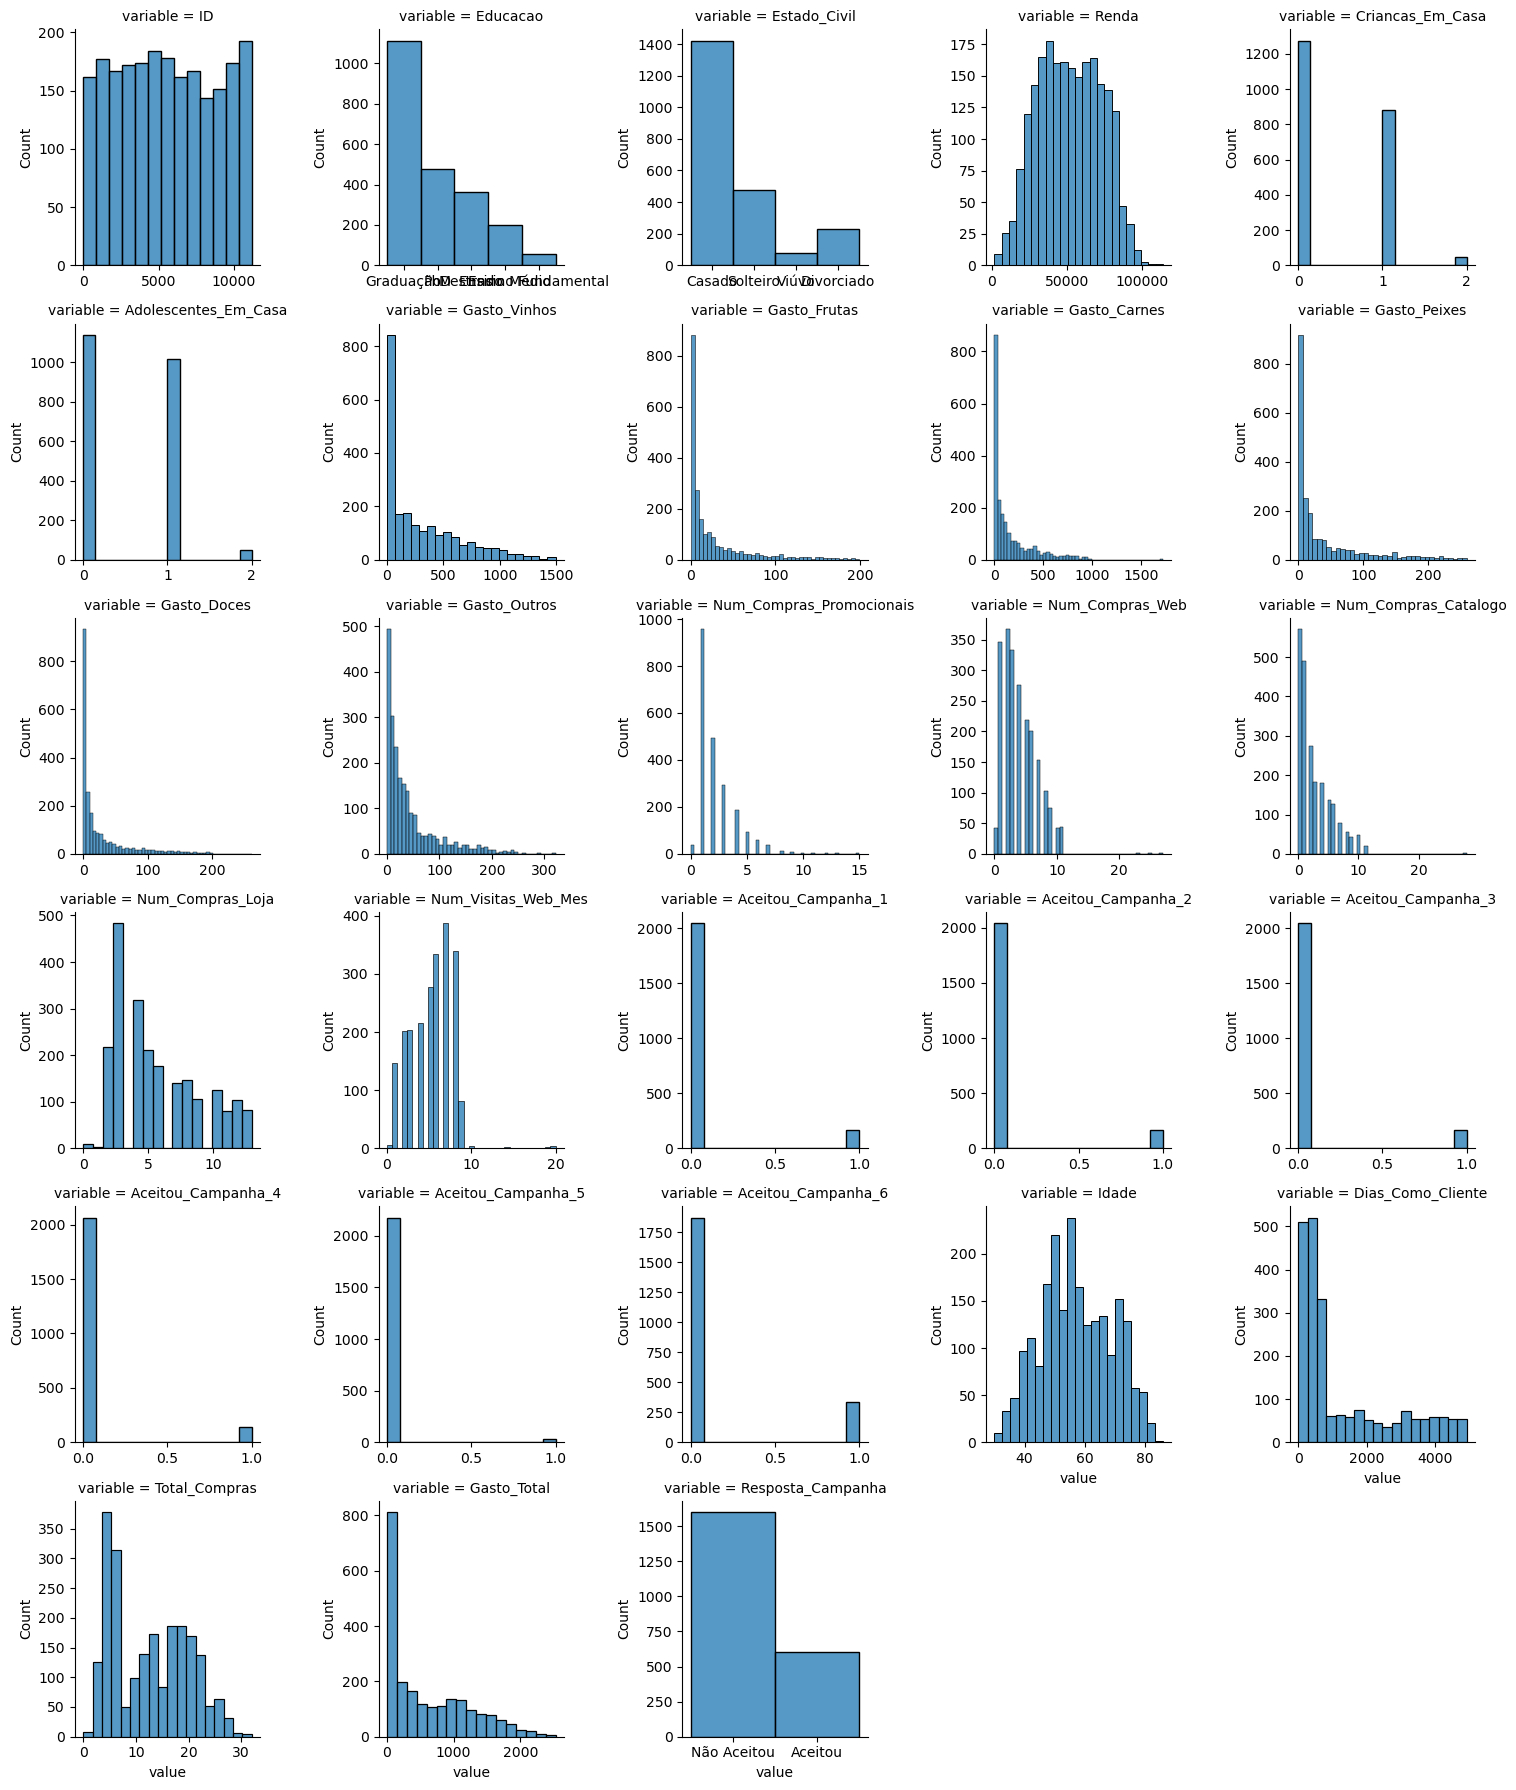

In [56]:
# Distribuição das variáveis
hist = pd.melt(df_marketing, value_vars = df_marketing)
hist = sns.FacetGrid(hist, col='variable', col_wrap=5, sharex=False, sharey=False)
hist.map(sns.histplot, 'value')

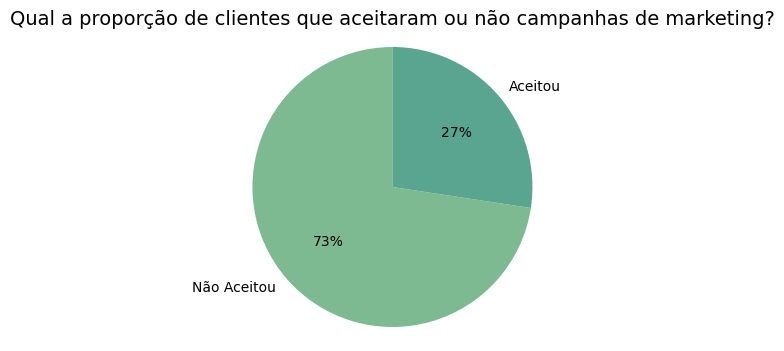

In [69]:
# Proporção de clientes que aceitaram/não aceitaram campanhas de marketing
fig, ax = plt.subplots(figsize=(6,4))

#contagem de ocorrências de cada resposta
contagem = df_marketing['Resposta_Campanha'].value_counts()
labels = contagem.index.tolist()

#formatação
cores = sns.color_palette('crest')

# Gráfico de Pizza
ax.pie(contagem, labels=labels, colors=cores, autopct='%.0f%%', startangle=90)
ax.set_title('Qual a proporção de clientes que aceitaram ou não campanhas de marketing?', fontsize=14)

# mantem os eixos iguais
ax.axis('equal')

plt.show()

27% dos clientes aceitaram (fizeram compras) após receberem as campanhas de marketing, enquanto 73% não aceitaram a campanha recebida.

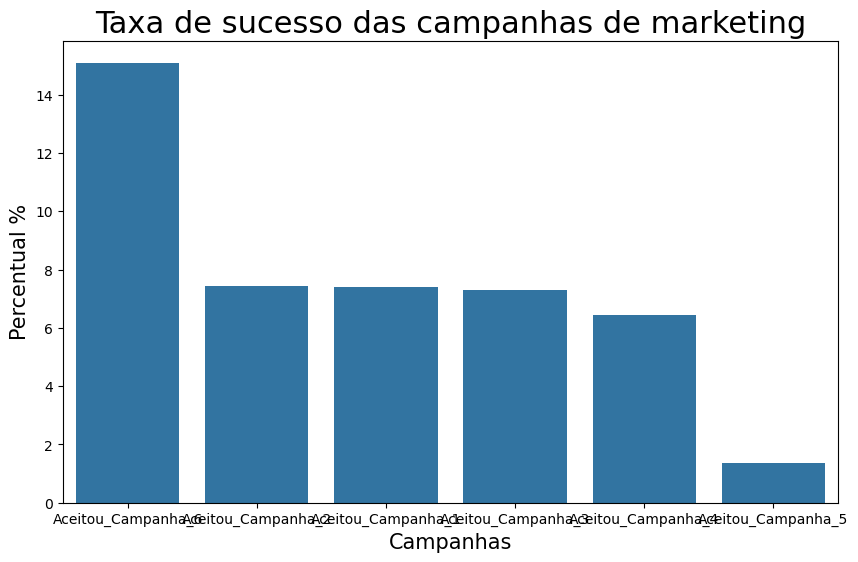

In [59]:
# Analisando a taxa de sucesso de cada campanha
campanhas = ['Aceitou_Campanha_1', 
             'Aceitou_Campanha_2',
             'Aceitou_Campanha_3', 
             'Aceitou_Campanha_4', 
             'Aceitou_Campanha_5',
             'Aceitou_Campanha_6']

# calculando o percentual de cada campanha
campanhas_pct = pd.DataFrame(df_marketing[campanhas].mean() * 100, columns=['Percentual']).reset_index()

# Plotagem do gráfico
plt.figure(figsize=(10,6))
ax = sns.barplot(x='index', y='Percentual', data=campanhas_pct.sort_values('Percentual', ascending=False))

# Formatação
plt.xlabel('Campanhas', size=15)
plt.ylabel('Percentual %', size=15)
plt.title('Taxa de sucesso das campanhas de marketing', size=22)

plt.show()

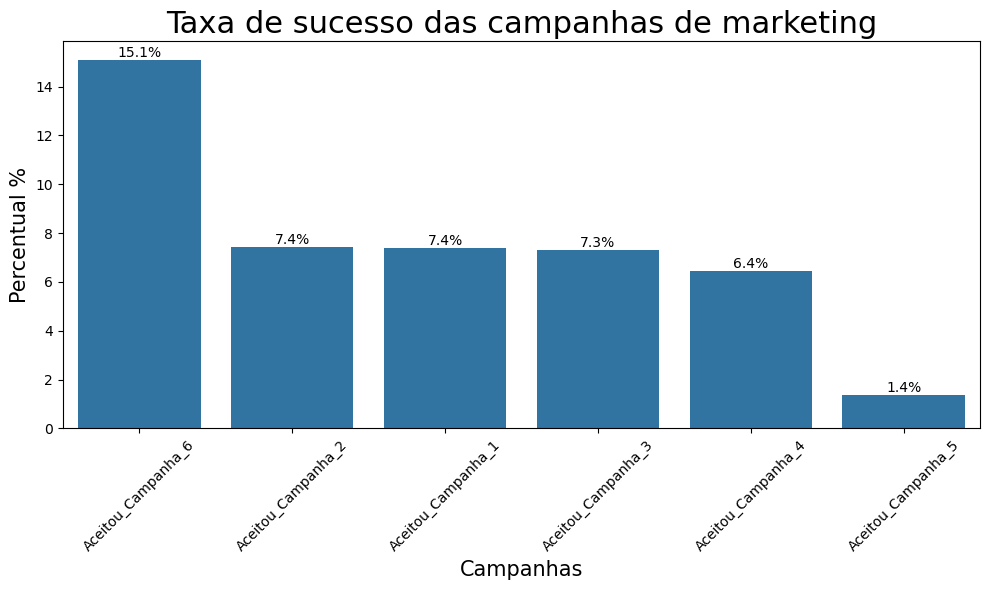

In [61]:
# Analisando a taxa de sucesso de cada campanha
campanhas = ['Aceitou_Campanha_1', 
             'Aceitou_Campanha_2',
             'Aceitou_Campanha_3', 
             'Aceitou_Campanha_4', 
             'Aceitou_Campanha_5',
             'Aceitou_Campanha_6']

# calculando o percentual de cada campanha
campanhas_pct = pd.DataFrame(df_marketing[campanhas].mean() * 100, columns=['Percentual']).reset_index()

# Plotagem do gráfico
plt.figure(figsize=(10,6))
ax = sns.barplot(x='index', y='Percentual', data=campanhas_pct.sort_values('Percentual', ascending=False))

# Formatação
plt.xlabel('Campanhas', size=15)
plt.ylabel('Percentual %', size=15)
plt.title('Taxa de sucesso das campanhas de marketing', size=22)

# melhorando a formatação
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', #recupera a altura da linha para exibir no gráfico
    (p.get_x() + p.get_width() / 2,
     p.get_height()),
    ha='center',
    va='bottom')

# inclinação dos rótulos no eixo x
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

A Campanha de maior sucesso foi a campanha 6, que atingiu uma taxa de conversão de 15,1% dos clientes que receberam essa campanha. 
A campanha menos efetiva foi a campanha 5, que teve apenas 1,4% de sucesso, As demais campanhas variaram entre 6,4% e 7,4%.

AVALIANDO SE A IDADE DO CLIENTE INFLUENCIA NO COMPORTAMENTO DE COMPRAS

In [62]:
df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2205 entries, 0 to 2236
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        2205 non-null   int64  
 1   Educacao                  2205 non-null   object 
 2   Estado_Civil              2205 non-null   object 
 3   Renda                     2205 non-null   float64
 4   Criancas_Em_Casa          2205 non-null   int64  
 5   Adolescentes_Em_Casa      2205 non-null   int64  
 6   Gasto_Vinhos              2205 non-null   int64  
 7   Gasto_Frutas              2205 non-null   int64  
 8   Gasto_Carnes              2205 non-null   int64  
 9   Gasto_Peixes              2205 non-null   int64  
 10  Gasto_Doces               2205 non-null   int64  
 11  Gasto_Outros              2205 non-null   int64  
 12  Num_Compras_Promocionais  2205 non-null   int64  
 13  Num_Compras_Web           2205 non-null   int64  
 14  Num_Compras_C

In [67]:
# Filtrando colunas categóricas para realizar o cálculo da correlação das colunas quantitativas
df_marketing_corr = df_marketing.drop(['ID',
                                       'Educacao',
                                       'Estado_Civil',
                                       'Criancas_Em_Casa',
                                       'Adolescentes_Em_Casa',
                                       'Aceitou_Campanha_1',
                                       'Aceitou_Campanha_2',
                                       'Aceitou_Campanha_3',
                                       'Aceitou_Campanha_4',
                                       'Aceitou_Campanha_5',
                                       'Aceitou_Campanha_6',
                                       'Resposta_Campanha'
                                      ], axis=1).corr()

coluna_corr = df_marketing_corr.loc['Idade']

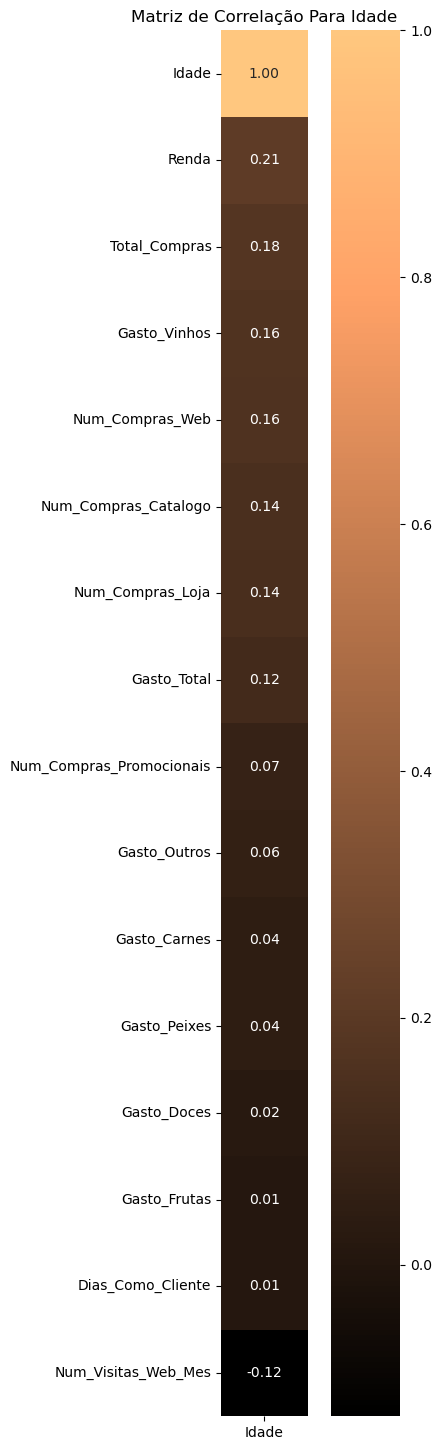

In [68]:
# Plotagem
plt.figure(figsize=(6,18))
sns.heatmap(pd.DataFrame(coluna_corr.sort_values(ascending=False)), annot=True, cmap='copper', cbar=True, square=True, fmt='.2f')
plt.title('Matriz de Correlação Para Idade')
plt.show()

A Idade do cliente não apresenta influência no comportamento de compra no conjunto de dados analisados, como podemos observar há baixa correlação entre as variáveis. A idade sozinha não pode ser considerada uma fator determinante para o comportamento de compras dos clientes com base na análise desse conjunto de dados.

ANÁLISE DA RELAÇÃO ENTRE GASTO TOTAL E A RESPOSTA AS CAMPANHAS DE MARKETING. QUAL A RELAÇÃO ENTRE ESSAS VARIÁVEIS?

<Axes: xlabel='Resposta_Campanha', ylabel='Gasto_Total'>

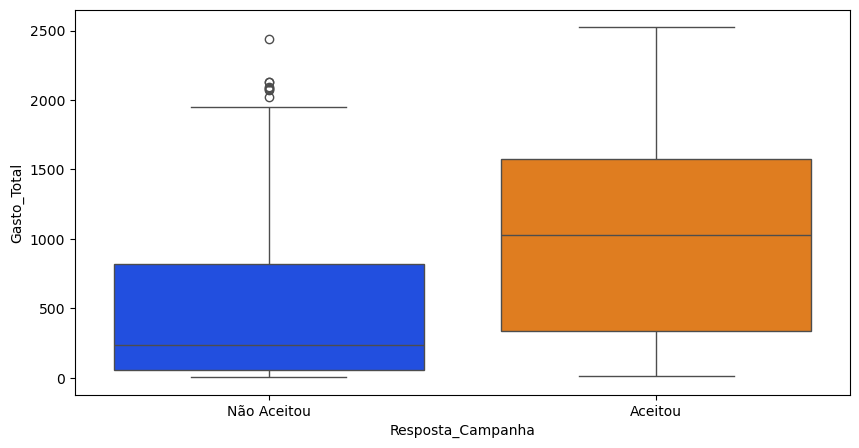

In [70]:
# Plotagem de boxplot para análise dos dados
plt.figure(figsize=(10,5))
sns.boxplot(x = 'Resposta_Campanha', y='Gasto_Total', data=df_marketing, palette='bright')

ANÁLISE DOS GASTOS POR CATEGORIAS DE PRODUTOS

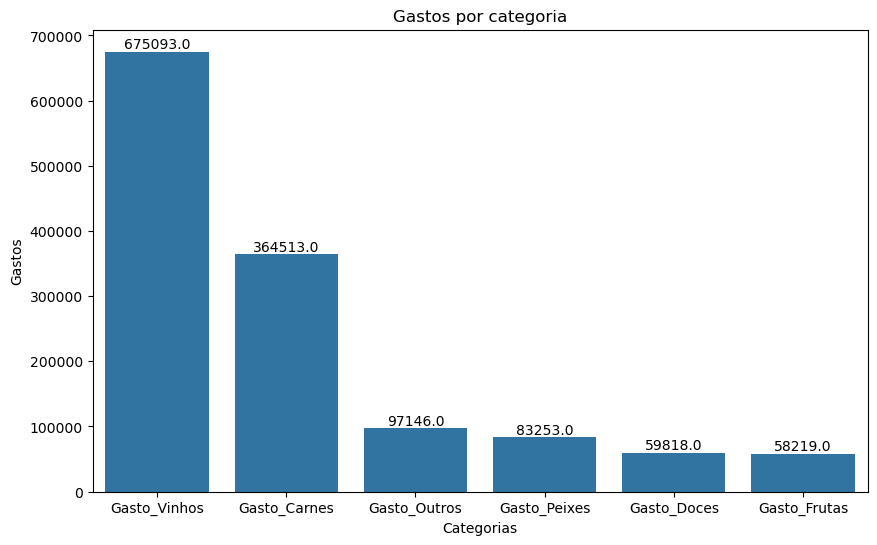

In [79]:
categorias = ['Gasto_Vinhos',
              'Gasto_Frutas', 
              'Gasto_Carnes', 
              'Gasto_Peixes', 
              'Gasto_Doces',
              'Gasto_Outros']

# Cria o dataframe com os totais
df_categorias = pd.DataFrame(df_marketing[categorias].sum(), columns=['Soma']).reset_index()

#plotagem
plt.figure(figsize=(10,6))
ax = sns.barplot(x='index', y='Soma', data=df_categorias.sort_values('Soma', ascending=False))

# melhorando a formatação
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', #recupera a altura da linha para exibir no gráfico
    (p.get_x() + p.get_width() / 2,
     p.get_height()),
    ha='center',
    va='bottom')

# inclinação dos rótulos no eixo x
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.title('Gastos por categoria')
plt.xlabel('Categorias')
plt.ylabel('Gastos')
plt.show()

ANALISANDO A RELAÇÃO ENTRE O GASTO COM VINHO E AS CAMPANHAS DE MARKETING

<Axes: xlabel='Resposta_Campanha', ylabel='Gasto_Vinhos'>

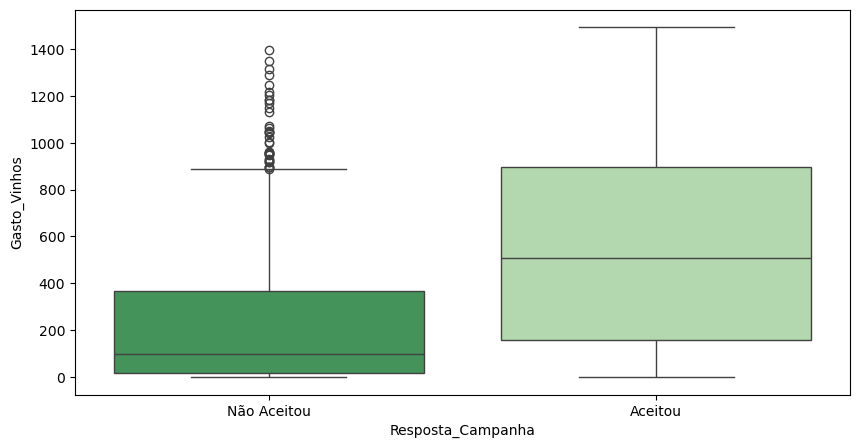

In [80]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Resposta_Campanha', y='Gasto_Vinhos', data=df_marketing, palette='Greens_r')

ANALISANDO A RELAÇÃO ENTRE RENDA E AS RESPOSTAS AS CAMPANHAS DE MARKETING

<Axes: xlabel='Resposta_Campanha', ylabel='Renda'>

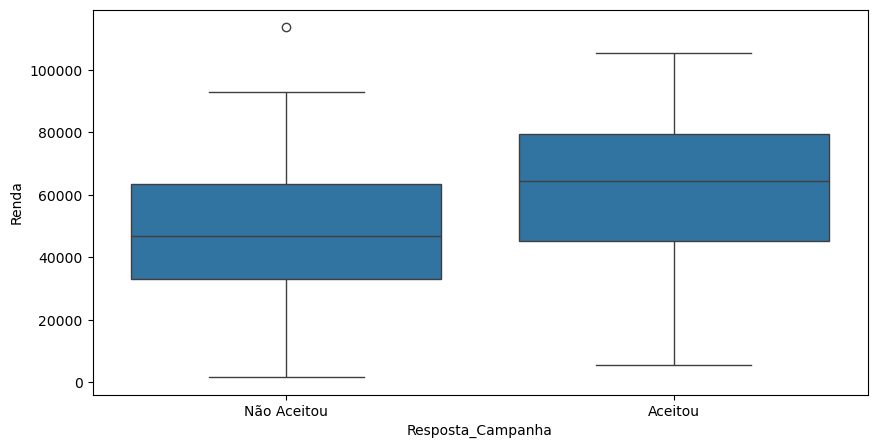

In [84]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Resposta_Campanha', y='Renda', data=df_marketing)

ANALISANDO A RELAÇÃO ENTRE RENDA E GASTO TOTAL

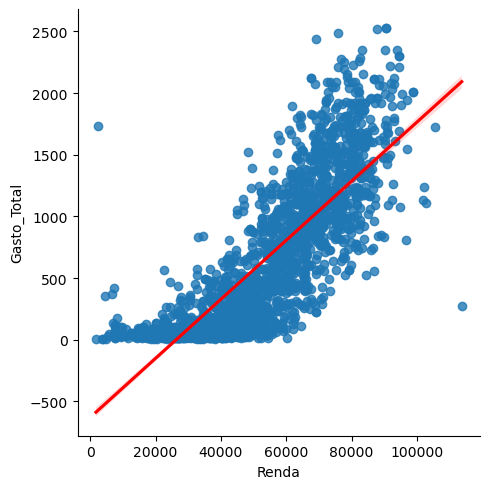

In [86]:
sns.lmplot(x='Renda', y='Gasto_Total', data=df_marketing, palette='blue', line_kws = {'color': 'red'})

QUAIS SÃO OS FATORES MAIS IMPORTANTES PARA EXPLICAR A DECISÃO DO CLIENTE EM ACEITAR OU NÃO A CAMPANHA?

In [87]:
df_marketing.head()

,ID,Educacao,Estado_Civil,Renda,Criancas_Em_Casa,Adolescentes_Em_Casa,Gasto_Vinhos,Gasto_Frutas,Gasto_Carnes,Gasto_Peixes,...,Aceitou_Campanha_2,Aceitou_Campanha_3,Aceitou_Campanha_4,Aceitou_Campanha_5,Aceitou_Campanha_6,Idade,Dias_Como_Cliente,Total_Compras,Gasto_Total,Resposta_Campanha
0,9970,Graduação,Casado,55375.0,0,1,42,11,57,10,...,0,0,0,0,0,49,255,8,162,Não Aceitou
1,4002,PhD,Casado,77037.0,0,1,463,96,333,168,...,0,0,0,0,0,66,259,26,1123,Não Aceitou
2,10914,Graduação,Solteiro,24163.0,1,1,4,1,7,2,...,0,0,0,0,0,56,1294,4,17,Não Aceitou
3,7279,PhD,Casado,69476.0,0,0,260,86,559,63,...,0,0,0,0,0,57,272,14,1044,Não Aceitou
4,10582,Graduação,Casado,72063.0,0,1,180,32,348,76,...,0,0,0,0,0,47,2665,19,758,Não Aceitou


In [89]:
# Usando One-hot encoding para converter variáveis texto em uma representação numérica
df_marketing_imp = pd.get_dummies(df_marketing, columns=['Educacao', 'Estado_Civil'])
df_marketing_imp.columns

Index(['ID', 'Renda', 'Criancas_Em_Casa', 'Adolescentes_Em_Casa',
       'Gasto_Vinhos', 'Gasto_Frutas', 'Gasto_Carnes', 'Gasto_Peixes',
       'Gasto_Doces', 'Gasto_Outros', 'Num_Compras_Promocionais',
       'Num_Compras_Web', 'Num_Compras_Catalogo', 'Num_Compras_Loja',
       'Num_Visitas_Web_Mes', 'Aceitou_Campanha_1', 'Aceitou_Campanha_2',
       'Aceitou_Campanha_3', 'Aceitou_Campanha_4', 'Aceitou_Campanha_5',
       'Aceitou_Campanha_6', 'Idade', 'Dias_Como_Cliente', 'Total_Compras',
       'Gasto_Total', 'Resposta_Campanha', 'Educacao_Ensino Fundamental',
       'Educacao_Ensino Médio', 'Educacao_Graduação', 'Educacao_Mestrado',
       'Educacao_PhD', 'Estado_Civil_Casado', 'Estado_Civil_Divorciado',
       'Estado_Civil_Solteiro', 'Estado_Civil_Viúvo'],
      dtype='object')

In [90]:
df_marketing_imp.head()

,ID,Renda,Criancas_Em_Casa,Adolescentes_Em_Casa,Gasto_Vinhos,Gasto_Frutas,Gasto_Carnes,Gasto_Peixes,Gasto_Doces,Gasto_Outros,...,Resposta_Campanha,Educacao_Ensino Fundamental,Educacao_Ensino Médio,Educacao_Graduação,Educacao_Mestrado,Educacao_PhD,Estado_Civil_Casado,Estado_Civil_Divorciado,Estado_Civil_Solteiro,Estado_Civil_Viúvo
0,9970,55375.0,0,1,42,11,57,10,28,14,...,Não Aceitou,False,False,True,False,False,True,False,False,False
1,4002,77037.0,0,1,463,96,333,168,53,10,...,Não Aceitou,False,False,False,False,True,True,False,False,False
2,10914,24163.0,1,1,4,1,7,2,1,2,...,Não Aceitou,False,False,True,False,False,False,False,True,False
3,7279,69476.0,0,0,260,86,559,63,9,67,...,Não Aceitou,False,False,False,False,True,True,False,False,False
4,10582,72063.0,0,1,180,32,348,76,32,90,...,Não Aceitou,False,False,True,False,False,True,False,False,False


In [91]:
# Removendo variáveis que seriam redundantes ou desnecessárias para essa análise
# Geramos os dados de entrada (X) e removemos a variável alvo (Resposta_Campanha), nosso y (dados de saída)
X = df_marketing_imp.drop(['ID', 'Gasto_Vinhos', 'Gasto_Frutas', 'Gasto_Carnes', 'Gasto_Peixes',
       'Gasto_Doces', 'Gasto_Outros', 'Num_Compras_Promocionais',
       'Num_Compras_Web', 'Num_Compras_Catalogo', 'Num_Compras_Loja',
       'Num_Visitas_Web_Mes','Aceitou_Campanha_1', 'Aceitou_Campanha_2',
       'Aceitou_Campanha_3', 'Aceitou_Campanha_4', 'Aceitou_Campanha_5',
       'Aceitou_Campanha_6', 'Resposta_Campanha'], axis = 1)

In [92]:
# Converte a variável para uma representação numérica
y = df_marketing_imp['Resposta_Campanha'].map({'Não Aceitou': 0, 'Aceitou': 1})

In [93]:
# Criação do modelo
modelo_rf = RandomForestClassifier(random_state=43)

In [94]:
# Treinamento do modelo com os dados de entrada e saída
modelo = modelo_rf.fit(X, y)

In [95]:
# Recupera a importância de cada variável
importancias = modelo.feature_importances_

In [96]:
# desvio padrão das importancias por caracteristicas
std = np.std([tree.feature_importances_ for tree in modelo.estimators_], axis = 0)

In [97]:
indices = np.argsort(importancias)

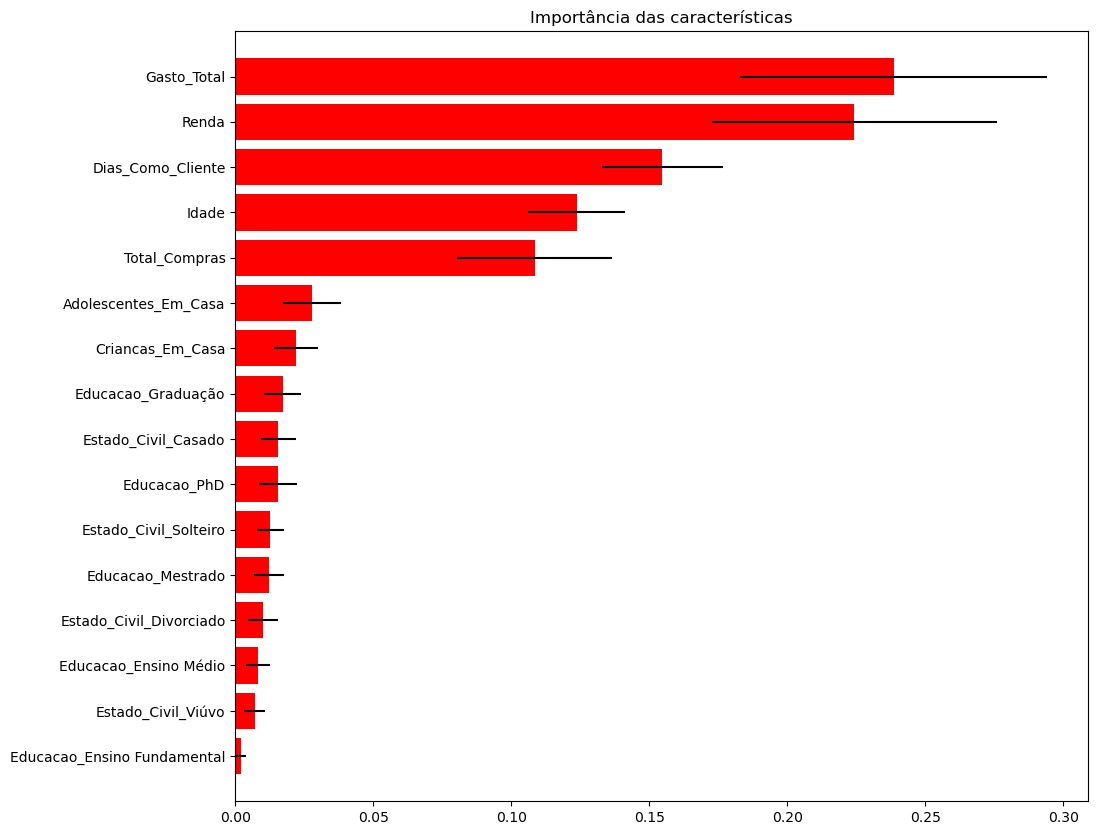

In [101]:
# Plotagem
plt.figure(figsize=(11,10))
plt.title('Importância das características')
plt.barh(range(X.shape[1]), importancias[indices], color='r', xerr=std[indices], align='center')
plt.yticks(range(X.shape[1]), X.columns[indices])
plt.ylim([-1, X.shape[1]])
plt.show()

TESTE DE HIPÓTESES
Com base na análise do gráfico acima o nível educacional parecer não ter relevância para explicar a aceitação do cliente as campanhas de marketing. Por outro lado, a renda é bastante relevante. É provável que a média de renda seja diferente entre níveis educacionais.

Vamos testar a hipótese de que existe diferença significativa entre as médias de renda dos clientes com ensino superior e sem ensino superior. Antes, vamos explorar a relação.

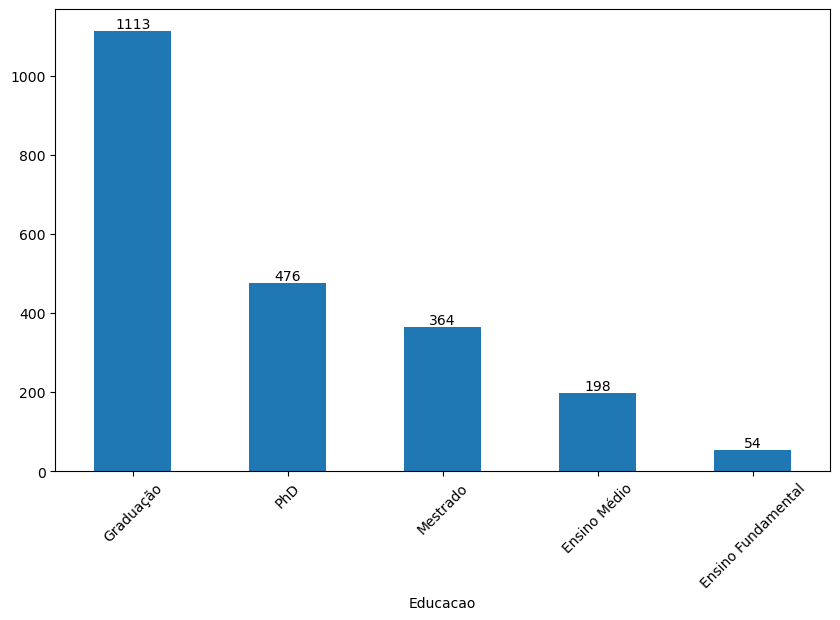

In [105]:
# Plotagem do total de clientes por nível educacional
plt.figure(figsize=(10,6))
ax = df_marketing.Educacao.value_counts().plot.bar()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.bar_label(ax.containers[0])
plt.show()

In [106]:
media_renda = df_marketing.groupby('Educacao')['Renda'].mean().reset_index()
media_renda = media_renda.sort_values('Renda')

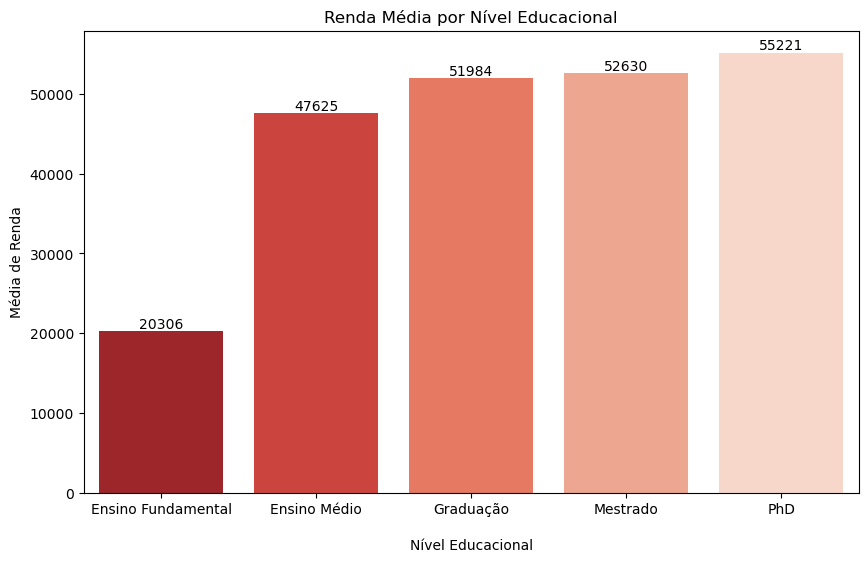

In [108]:
# Plotagem da média de renda
plt.figure(figsize=(10,6))
ax = sns.barplot(x=media_renda['Educacao'], y=media_renda['Renda'], data=df_marketing, palette='Reds_r')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center',
                va='bottom')
plt.xlabel('\nNível Educacional')
plt.ylabel('Média de Renda')
plt.title('Renda Média por Nível Educacional')
plt.show()

In [109]:
# Iniciando o teste de hipótese
df_marketing['Educacao'] = df_marketing['Educacao'].map({'Ensino Fundamental': 1,
                                                        'Ensino Médio': 2,
                                                        'Graduação': 3,
                                                        'Mestrado': 4,
                                                        'PhD': 5})

In [110]:
df_marketing.head()

,ID,Educacao,Estado_Civil,Renda,Criancas_Em_Casa,Adolescentes_Em_Casa,Gasto_Vinhos,Gasto_Frutas,Gasto_Carnes,Gasto_Peixes,...,Aceitou_Campanha_2,Aceitou_Campanha_3,Aceitou_Campanha_4,Aceitou_Campanha_5,Aceitou_Campanha_6,Idade,Dias_Como_Cliente,Total_Compras,Gasto_Total,Resposta_Campanha
0,9970,3,Casado,55375.0,0,1,42,11,57,10,...,0,0,0,0,0,49,255,8,162,Não Aceitou
1,4002,5,Casado,77037.0,0,1,463,96,333,168,...,0,0,0,0,0,66,259,26,1123,Não Aceitou
2,10914,3,Solteiro,24163.0,1,1,4,1,7,2,...,0,0,0,0,0,56,1294,4,17,Não Aceitou
3,7279,5,Casado,69476.0,0,0,260,86,559,63,...,0,0,0,0,0,57,272,14,1044,Não Aceitou
4,10582,3,Casado,72063.0,0,1,180,32,348,76,...,0,0,0,0,0,47,2665,19,758,Não Aceitou


In [111]:
# Dados que serão testados
dados_teste = df_marketing[['Renda', 'Educacao']]

In [112]:
dados_teste.head()

,Renda,Educacao
0,55375.0,3
1,77037.0,5
2,24163.0,3
3,69476.0,5
4,72063.0,3


In [115]:
# Aplicando o teste de normalidade para validar a distribuição dos dados para escolher o teste estatístico
# Teste Shapiro-Wilk
def teste_normalidade(colunas):
    for coluna in colunas:
        estatistica, valor_p = shapiro(dados_teste[coluna])
        
        alpha = 0.05

        if valor_p < alpha:
            print(f'\n{coluna}: Alpha {alpha} < valor-p {valor_p:.2f} - Rejeitamos a H0 do teste Shapiro-Wilk. Os dados não seguem uma distribuição Normal')
        else:
            print(f'\n{coluna}: Alpha {alpha} > valor-p {valor_p:.2f} - Falhamos em rejeitas a H0 do teste Shapiro-Wilk. . Os dados seguem uma distribuição Normal')

In [116]:
teste_normalidade(dados_teste)


Renda: Alpha 0.05 < valor-p 0.00 - Rejeitamos a H0 do teste Shapiro-Wilk. Os dados não seguem uma distribuição Normal

Educacao: Alpha 0.05 < valor-p 0.00 - Rejeitamos a H0 do teste Shapiro-Wilk. Os dados não seguem uma distribuição Normal


In [121]:
# Como os dados não seguem uma distribuição normal, será utilizado um teste não paramétrico para validar a hipótese
# criando os grupos
graduados = df_marketing[df_marketing['Educacao'].isin([5,4,3])]['Renda']
nao_graduados = df_marketing[df_marketing['Educacao'].isin([2,1])]['Renda']

estatistica, valor_p = mannwhitneyu(graduados, nao_graduados)

alpha = 0.05

if valor_p < alpha:
    print(f'\nAlpha {alpha} < valor-p {valor_p:.2f} - Rejeitamos a H0. Há uma diferença significativa nas méidas de renda entre os grupos')
else:
    print(f'\nAlpha {alpha} > valor-p {valor_p:.2f} - Falhamos em rejeitar a H0. Não há diferença significativa nas médias de renda entre os grupos')


Alpha 0.05 < valor-p 0.00 - Rejeitamos a H0. Há uma diferença significativa nas méidas de renda entre os grupos


## CONCLUSAO ##

Com base na análise dos dados, os fatores mais relevantes para a aceitação das campanhas de marketing e conversão em vendas são o histórico de gasto total, a renda, o tempo total como cliente (fidelidade) e o total de compras anteriores. Ou seja, clientes fiéis possuem maior tendência a aceitar as campanhas de marketing.

Nível educacional e estado civil não aparentam ter relevancia significativa na conversão dos clientes. Validamos isso através de um teste de hipótese.

Ao testar a hipótese que existe diferença significativa entre as médias de renda de clientes com ou sem ensino superior, ficou evidente que existe diferença. E também vimos que níveis educacionais mais altos tem maior renda.

Logo, a empresa deveria segmentar as campanhas para diferentes públicos, focando em direcionar as campanhas com base na renda, nível educacional e considerando os clientes mais antigos e com grande volume de compras, ou seja, os mais fiéis.